# Installing the required packages

In [2]:
!pip install -U langchain-community

In [4]:
!pip install transformers -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 16.0 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 14.4 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.19.1
    Uninstalling tokenizers-0.19.1:
      Successfully uninstalled tokenizers-0.19.1
  Attempting uninstall: transformers
    Found existing installation: transformers 4.41.1
    Uninstalling transformers-4.41.1:
      Successfully uninstalled transformers-4.41.1


In [3]:
import requests
from bs4 import BeautifulSoup
from PyPDF2 import PdfMerger
import os

# Loading Environment variables and required documents

In [4]:
#loading environment variables
import os

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv())

In [5]:
#setting up the api keys

os.environ["HUGGINGFACEHUB_API_TOKEN"] = 'YOUR_HUGGINGFACEHUB_API_KEY'
os.environ["COHERE_API_KEY"] = 'YOUR_COHERE_API_KEY'

<h1>PDF download and merging code here</h1>

In [11]:
import os
from PyPDF2 import PdfMerger

def merge_pdfs_in_folder(folder_path, output_pdf_path):
    # Initialize the PdfMerger
    merger = PdfMerger()

    # Get all PDF files in the folder, sorted alphabetically
    pdf_files = [f for f in os.listdir(folder_path) if f.endswith('.pdf')]
    pdf_files.sort()

    # Add each PDF to the merger
    for pdf_file in pdf_files:
        pdf_path = os.path.join(folder_path, pdf_file)
        print(f"Adding {pdf_path} to the merger")
        merger.append(pdf_path)

    # Write the merged PDF to the output path
    merger.write(output_pdf_path)
    merger.close()
    print(f"All PDFs merged into {output_pdf_path}")

if __name__ == '__main__':
    folder_path = './downloads'  # Folder containing PDFs
    output_pdf_path = 'final_output.pdf'  # Output merged PDF
    merge_pdfs_in_folder(folder_path, output_pdf_path)


Adding ./downloads/Chapter 6 FTP 2023.pdf to the merger
Adding ./downloads/FTP2023_Chapter01.pdf to the merger
Adding ./downloads/FTP2023_Chapter02.pdf to the merger
Adding ./downloads/FTP2023_Chapter03.pdf to the merger
Adding ./downloads/FTP2023_Chapter04.pdf to the merger
Adding ./downloads/FTP2023_Chapter05.pdf to the merger
Adding ./downloads/FTP2023_Chapter07.pdf to the merger
Adding ./downloads/FTP2023_Chapter08.pdf to the merger
Adding ./downloads/FTP2023_Chapter09.pdf to the merger
Adding ./downloads/FTP2023_Chapter10.pdf to the merger
Adding ./downloads/FTP2023_Chapter11.pdf to the merger
All PDFs merged into final_output.pdf


In [12]:
#loading the annual report document only
from langchain.document_loaders import PyPDFLoader
docs =[]
file_path = 'final_output.pdf'
loader = PyPDFLoader(file_path)
docs.extend(loader.load())

In [13]:
len(docs)

90

# Embedding

In [10]:
embedding_model_name = 'BAAI/bge-small-en-v1.5'

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
from transformers import AutoTokenizer
def plot_docs_tokens(docs,embedding_model_name):
    tokenizer= AutoTokenizer.from_pretrained(embedding_model_name)
    lengths= [
        len(tokenizer.encode(doc.page_content))
        # len(doc.page_content)
        for doc in docs
    ]
    print(max(lengths))
    print(min(lengths))
    fig = pd.Series(lengths).hist()
    plt.show()


# This function, plot_docs_tokens, takes a list of documents and a pre-trained model
# name to visualize the token count distribution for each document's content.
# It loads a tokenizer based on the specified model, encodes each document to determine its token length, and prints the maximum and minimum token counts.
# Finally, it plots a histogram to show the distribution of token lengths, giving insight into the variability in token usage across the documents.

In [15]:
# document split into chunks
from langchain.text_splitter import RecursiveCharacterTextSplitter
text_splitter = RecursiveCharacterTextSplitter.from_huggingface_tokenizer(
    AutoTokenizer.from_pretrained(embedding_model_name),
    chunk_size=400,
    chunk_overlap = 50
)
chunks = text_splitter.split_documents(docs)


# This code uses LangChain’s `RecursiveCharacterTextSplitter` to split documents into smaller chunks based on token counts,
# making it easier to process large texts within token limits.
# It initializes the splitter with a tokenizer from Hugging Face, specifying a `chunk_size` of 400 tokens and a `chunk_overlap` of 50 tokens
# to allow for slight overlap between chunks.
# The `split_documents` method then applies this splitter to `docs`, producing manageable, token-based text chunks.

300
7


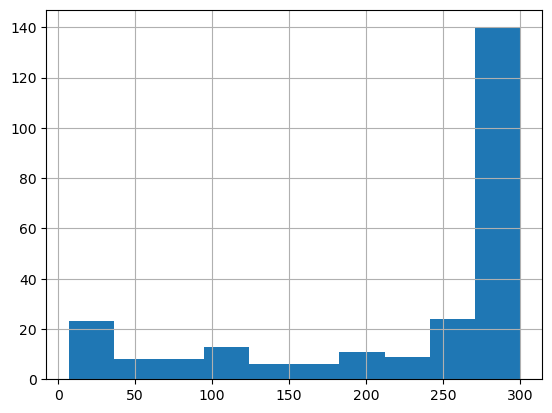

In [16]:
#plotting graph to decide chunk size
plot_docs_tokens(chunks,embedding_model_name)

In [17]:
#creating vector database
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.vectorstores import Chroma

vectordb = Chroma.from_documents(
    documents=chunks,
    embedding=HuggingFaceEmbeddings(),
    persist_directory='rag/pidilite_vector_db/vectordb5_annualreport/'
)

# This code creates a vector database using LangChain’s `Chroma` to store embeddings of document chunks, enabling efficient similarity search.
# It uses `HuggingFaceEmbeddings` to generate embeddings for each chunk in `chunks`.
# The `Chroma.from_documents` method is called to create the vector database, with `persist_directory`
# set to save the database to a specified path (`/rag/pidilite_vector_db/vectordb5_annualreport/`).
# This allows the vector database to be saved and reloaded as needed.

/var/folders/4m/69mpqqpx0051vxfknj_gq50r0000gn/T/ipykernel_2488/3671667056.py:7: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embedding=HuggingFaceEmbeddings(),
/var/folders/4m/69mpqqpx0051vxfknj_gq50r0000gn/T/ipykernel_2488/3671667056.py:7: LangChainDeprecationWarning: Default values for HuggingFaceEmbeddings.model_name were deprecated in LangChain 0.2.16 and will be removed in 0.4.0. Explicitly pass a model_name to the HuggingFaceEmbeddings constructor instead.
  embedding=HuggingFaceEmbeddings(),
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disabl

In [18]:
vectordb.persist()
# This is like commit. Saves the vectordb to the disk

/var/folders/4m/69mpqqpx0051vxfknj_gq50r0000gn/T/ipykernel_2488/1137843895.py:1: LangChainDeprecationWarning: Since Chroma 0.4.x the manual persistence method is no longer supported as docs are automatically persisted.
  vectordb.persist()


# loading the vector database

In [20]:
vectordb5 = Chroma(persist_directory='rag/pidilite_vector_db/vectordb5_annualreport/',  embedding_function=HuggingFaceEmbeddings())
vectordb5.get()

/var/folders/4m/69mpqqpx0051vxfknj_gq50r0000gn/T/ipykernel_2488/4030824107.py:1: LangChainDeprecationWarning: Default values for HuggingFaceEmbeddings.model_name were deprecated in LangChain 0.2.16 and will be removed in 0.4.0. Explicitly pass a model_name to the HuggingFaceEmbeddings constructor instead.
  vectordb5 = Chroma(persist_directory='rag/pidilite_vector_db/vectordb5_annualreport/',  embedding_function=HuggingFaceEmbeddings())
/var/folders/4m/69mpqqpx0051vxfknj_gq50r0000gn/T/ipykernel_2488/4030824107.py:1: LangChainDeprecationWarning: The class `Chroma` was deprecated in LangChain 0.2.9 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-chroma package and should be used instead. To use it run `pip install -U :class:`~langchain-chroma` and import as `from :class:`~langchain_chroma import Chroma``.
  vectordb5 = Chroma(persist_directory='rag/pidilite_vector_db/vectordb5_annualreport/',  embedding_function=HuggingFaceEmbeddings())


{'ids': ['5e39a2de-1ee7-4261-ae42-58167b41f187',
  'b476b9ba-4b97-4a48-a0bb-15ecb480cf53',
  'fbafb707-0623-404c-af1f-57e76ca1925b',
  'bc555d86-8400-4297-9c6c-35274c6980ed',
  'c1639fe7-876a-4f6a-95a5-c4c2c444d44e',
  '8c3d1e36-585f-45be-b55e-700a8f603683',
  'c5c6233b-cc7f-4a44-ab05-5005d5d1dda8',
  'c7229c9e-13ba-4cc8-85d5-750f0694d31a',
  '253bcf44-23a5-463c-8b6f-216d8e6ab001',
  '9cc6f595-a6c4-46bb-ac82-76bb89abcc59',
  'c3bbf30b-ed6b-4369-9347-550fcdb9a0db',
  '30cc70ac-a1d6-465f-8375-b80889b86cbe',
  '9d4c6758-8e02-4a4d-99e4-8399ed860c8f',
  'dd16e8e2-479a-4505-9a9e-7ee54aae4cc4',
  '7fe5f113-1ac9-4399-9864-fd60d2be1a04',
  '87bcfe93-7b2d-486f-a93d-b540c9c72f0d',
  '72f298da-5f12-4c1c-acde-49bb8953afce',
  '618b22d9-fd41-43f9-af57-af4c55f75eb3',
  '42968cbc-9e36-42de-9588-43d46d5b408b',
  '42eeadd4-8975-41be-ab64-d73e0e9ff4b1',
  '5b4411ae-0e46-473e-9221-3912dd38d185',
  '815f76c8-9557-41dd-91f9-f91cb29a9dbb',
  '47741b03-d8fc-442a-8d48-09bb215a537e',
  'b2c74ce0-7373-463e-bead-

# Default retriever (with MMR)

In [21]:
retriever = vectordb5.as_retriever(search_kwargs={"k": 12})

# MultiQuery retriever

In [22]:
from langchain_cohere.chat_models import ChatCohere
chat = ChatCohere(model="command-r-plus", temperature=0)

In [23]:
from langchain_community.llms import HuggingFaceHub
llm = HuggingFaceHub(task='text-generation',
                     repo_id="mistralai/Mixtral-8x7B-Instruct-v0.1",
                     model_kwargs={"max_token_length":3000, "max_new_token":4000}
                     )

/var/folders/4m/69mpqqpx0051vxfknj_gq50r0000gn/T/ipykernel_2488/2738463466.py:2: LangChainDeprecationWarning: The class `HuggingFaceHub` was deprecated in LangChain 0.0.21 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEndpoint``.
  llm = HuggingFaceHub(task='text-generation',


In [24]:
from langchain.retrievers.multi_query import MultiQueryRetriever

mq_retriever = MultiQueryRetriever.from_llm(
    retriever=retriever, llm=llm
)

# Gets the retiever to retrieve the top 12 and then the llm changes them as needed

#exceeding max token limit

# Contextual Compression

In [25]:
from langchain.retrievers import ContextualCompressionRetriever
from langchain.retrievers.document_compressors import LLMChainExtractor

compressor = LLMChainExtractor.from_llm(chat)
compression_retriever = ContextualCompressionRetriever(base_compressor=compressor,
                                                       base_retriever=retriever)


# Retrieves the content and applies compression to retain only the most impt info.

#time consuming. results are similar as mmr

# Parent Retriever

In [26]:
from langchain.retrievers import ParentDocumentRetriever
from langchain.storage import InMemoryStore,LocalFileStore
from langchain.storage._lc_store import create_kv_docstore

In [27]:
local_store = LocalFileStore('rag/pidilite_vector_db/local_file_store')
docstore = create_kv_docstore(local_store)

In [28]:
vectorstore = Chroma(
    persist_directory='rag/pidilite_vector_db/local_vector_store',
    embedding_function=HuggingFaceEmbeddings(),
)

/var/folders/4m/69mpqqpx0051vxfknj_gq50r0000gn/T/ipykernel_2488/4180434863.py:3: LangChainDeprecationWarning: Default values for HuggingFaceEmbeddings.model_name were deprecated in LangChain 0.2.16 and will be removed in 0.4.0. Explicitly pass a model_name to the HuggingFaceEmbeddings constructor instead.
  embedding_function=HuggingFaceEmbeddings(),


In [29]:
vectorstore2 = Chroma(persist_directory='rag/pidilite_vector_db/local_vector_store/',  embedding_function=HuggingFaceEmbeddings())
vectorstore2.get()

/var/folders/4m/69mpqqpx0051vxfknj_gq50r0000gn/T/ipykernel_2488/2551860405.py:1: LangChainDeprecationWarning: Default values for HuggingFaceEmbeddings.model_name were deprecated in LangChain 0.2.16 and will be removed in 0.4.0. Explicitly pass a model_name to the HuggingFaceEmbeddings constructor instead.
  vectorstore2 = Chroma(persist_directory='rag/pidilite_vector_db/local_vector_store/',  embedding_function=HuggingFaceEmbeddings())


{'ids': ['9bbd5f18-dc71-4e64-9afd-6726e1931087',
  'a6fbd9b7-f1ce-40eb-833d-c182545ab10a',
  '98943025-1398-4251-aed0-4c063f776401',
  '06161227-edf5-4c0e-a25e-cb683f0d3617',
  '6bfb4f69-3965-4c89-9e50-66f5b4f3d6e9',
  '93490271-f986-4556-9b0c-b8795a908b98',
  'bb661476-8fdb-4c1d-b026-9a8f68444ec4',
  '7657b0cb-9117-40fa-87e8-b710d2d0c02d',
  'd4bd4d9b-4d35-4f63-a493-2eafd8703c25',
  '41cf2452-9d92-442d-9ed8-fd96fc1ab7f0',
  '1c943815-4202-4f6d-ac38-4aacbd1be462',
  '33610ce4-f8dd-4f21-ad70-a0b77d1a3219',
  'c64a61fc-3ccb-4ed6-8d9b-0b31aa856f1e',
  'e116ed17-cab5-4583-825d-b7af1e0b6c76',
  'e4517767-48bf-4af6-aa58-9597231e5669',
  '1ac636a5-aab2-4899-9a78-72baaca47184',
  'f64148de-352b-4794-b779-6dd2269f04f0',
  '6e939a00-b414-4178-9462-4c9777ef505a',
  'c187c1e3-8978-4d96-ab90-59914a7cd26a',
  '087bd55e-0fbf-4639-bdeb-b74f3528966d',
  '3d6eb568-5b94-4a52-a9f0-7fcbea9b1445',
  '43cc049a-7155-4016-8eef-023eecb40688',
  '17b2889d-a8ad-4671-9d74-eb01f014aaa1',
  'f07b3ccf-276f-4a91-87ae-

In [30]:
# This text splitter is used to create the parent documents
parent_splitter = RecursiveCharacterTextSplitter(chunk_size=2000,chunk_overlap=40)

# This text splitter is used to create the child documents
# It should create documents smaller than the parent
child_splitter = RecursiveCharacterTextSplitter(chunk_size=400,chunk_overlap=40)

# The storage layer for the parent documents
# store = InMemoryStore()
# The storage layer for the parent documents
pd_retriever = ParentDocumentRetriever(
    vectorstore=vectorstore2,
    docstore=docstore,
    child_splitter=child_splitter,
    parent_splitter=parent_splitter,
)

In [31]:
vectorstore.persist()

In [32]:
pd_retriever.add_documents(docs, ids=None)

# Ensemble retriever

In [33]:
from langchain.retrievers import BM25Retriever, EnsembleRetriever

In [34]:
# !pip install rank_bm25

In [35]:
bm25_retriever = BM25Retriever.from_documents(chunks)
bm25_retriever.k = 10

# This code creates a `BM25Retriever` using the BM25 algorithm, which is commonly used for keyword-based retrieval in information retrieval systems.
# It initializes the retriever with the document `chunks`, and by setting `bm25_retriever.k = 10`, it limits the number of top results returned to 10.
# This retriever ranks documents based on term frequency and inverse document frequency,
# making it useful for retrieving text with high keyword relevance to a query.

In [36]:
# vectordb_retriever = vectordb3.as_retriever(search_kwargs={"k": 3})
vectordb_retriever = vectordb5.as_retriever(search_type="mmr", search_kwargs={"score_threshold": 10})
# Maximum Marginal Relevance

In [37]:
ensemble_retriever = EnsembleRetriever(retrievers=[bm25_retriever, retriever], weights=[0.5, 0.5])

In [38]:
#emsemble retriever(combines multiple retrievers together)
#self query (additional filter using meta data)

In [39]:
# !pip install langchain langchain_cohere

#testing retrievers using llm

In [40]:
from langchain.prompts import ChatPromptTemplate

template = """Here is the context:
{context}
Use these to synthesize an answer to the question with steps: {question}
Answer:
"""
prompt = ChatPromptTemplate.from_template(template)

<h1>Function for translation using google translate API</h1>

In [42]:
from deep_translator import GoogleTranslator

def translator_func(text, lang1, lang2):
    translated = GoogleTranslator(source=lang1, target=lang2).translate(text)
    return translated


In [43]:
# This must be user input
question1 = "Can you define Counter Trade?" 
question1

'Can you define Counter Trade?'

In [46]:

# Retrieve Relevant Context
retrieved_chunks = retriever.get_relevant_documents(question)

# Use the correct attribute to access the document text
context = "\n".join([chunk.page_content for chunk in retrieved_chunks])

/var/folders/4m/69mpqqpx0051vxfknj_gq50r0000gn/T/ipykernel_2488/1549801595.py:2: LangChainDeprecationWarning: The method `BaseRetriever.get_relevant_documents` was deprecated in langchain-core 0.1.46 and will be removed in 1.0. Use :meth:`~invoke` instead.
  retrieved_chunks = retriever.get_relevant_documents(question)


In [47]:
formatted_prompt = prompt.format(context=context, question=question)
a=chat.invoke(formatted_prompt)

In [52]:
b=a.content.split('\n')

In [54]:
b = [ele for ele in b if ele != ""]
b

['Counter Trade is a trade arrangement where exports and imports between India and another country are balanced. This balance can be achieved through direct imports and exports with the trading country or through a third country, under a Trade Agreement or other arrangement. Counter Trade can be facilitated through various means, including Escrow Accounts, Buy Back agreements, Barter trade, or similar mechanisms. The balancing of exports and imports can be done in whole or in part through cash, goods, and/or services.']

In [60]:
question2 = "What are the terms of third party exports"
question2

'What are the terms of third party exports'

In [61]:
formatted_prompt = prompt.format(context=context, question=question2)
a=chat.invoke(formatted_prompt)

In [62]:
b=a.content.split('\n')

In [63]:
b = [ele for ele in b if ele != ""]
b

['Here is a synthesis of the relevant information from the provided text to answer your question about the terms of third-party exports:',
 '**Terms of Third-Party Exports:**',
 'According to the Foreign Trade Policy 2023, "Counter Trade" is a term used to describe a type of trade arrangement where exports and imports to and from India are balanced. This can be done either through direct imports/exports from the importing/exporting country or through a third country under a Trade Agreement or other similar arrangements.',
 '**Key Points:**',
 '1. **Balancing of Trade:** Third-party exports under Counter Trade can be used to balance exports and imports, and this balancing can be done wholly or partly in cash, goods, and/or services.',
 '2. **Arrangement Types:** Escrow Account, Buy Back arrangements, Barter trade, or any other similar arrangement can facilitate third-party exports.',
 '3. **Role of Central Government:** The Central Government plays a crucial role in approving developers

In [85]:
question3 = "Explain Advance Authorisation for Precious Metals"

In [86]:
formatted_prompt = prompt.format(context=context, question=question3)
a=chat.invoke(formatted_prompt)

In [87]:
b=a.content.split('\n')

In [88]:
b = [ele for ele in b if ele != ""]
b

['Here is a response to the question "Explain Advance Authorisation for Precious Metals" using the provided context: ',
 'Advance Authorization for precious metals is a scheme that allows importers of precious metals to import capital goods, such as machinery and equipment, as well as consumables that are required for the manufacturing process, without having to pay customs duties. ',
 'The scheme is designed to facilitate the import of these items by providing a duty exemption, with the understanding that the imported goods will be used in the manufacturing process and may not form part of the end product. This is done to encourage and support the development and growth of various industries within Special Economic Zones (SEZs) in India. ',
 'The relevant definitions from the provided context are as follows: ',
 '1. "Capital Goods": Refers to any plant, machinery, equipment, or accessories required for manufacturing, production, or rendering services. This includes items needed for re

In [89]:
# This must be user input
user_inp = "Pouvez-vous définir le Counter Trade?" 
question = translator_func(user_inp,'fr','en')
question

'Can you define Counter Trade?'

In [91]:
formatted_prompt = prompt.format(context=context, question=question)
a=chat.invoke(formatted_prompt)

In [92]:
b=a.content.split('\n')

In [96]:
text_string = " ".join(b)
# reply
ans = translator_func(text_string, 'en', 'fr')
ans

"Le commerce de compensation est un accord commercial dans lequel les exportations et les importations entre l'Inde et un autre pays sont équilibrées. Cet équilibre peut être obtenu par des importations et des exportations directes avec le pays commerçant ou par l'intermédiaire d'un pays tiers, dans le cadre d'un accord commercial ou d'un autre accord. Le commerce de compensation peut être facilité par divers mécanismes tels que les comptes séquestres, les accords de rachat, le troc ou des accords similaires. L'équilibrage des exportations et des importations peut être effectué en tout ou en partie au moyen d'espèces, de biens et/ou de services."

In [97]:
reply

['Counter Trade is a trade arrangement where exports and imports between India and another country are balanced. This balance can be achieved through direct imports and exports with the trading country or through a third country, under a Trade Agreement or other arrangement. Counter Trade can be facilitated through various mechanisms such as Escrow Accounts, Buy Back agreements, Barter trade, or similar arrangements. The balancing of exports and imports can be done in whole or in part through cash, goods, and/or services.']

<h1>Code for summarization</h1>

In [98]:
from transformers import pipeline

# Load a pre-trained summarization model (sshleifer/distilbart-cnn-12-6)
summarizer = pipeline("summarization", model="sshleifer/distilbart-cnn-12-6")


# Change the length of the output text as needed
def summarize_text(text):
    summary = summarizer(text, max_length=50, min_length=50, do_sample=False)
    return summary[0]['summary_text']

# Example usage

summary = summarize_text(ans)
print(summary)


Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


model.safetensors:  55%|#####4    | 671M/1.22G [00:00<?, ?B/s]

 L'équilibrage des exportations et des importations peut être effectué en tout ou en partie au moyen d'espèces, de biens et/ou de
